In [1]:
#import library
import pandas as pd
import numpy as np

In [2]:
#Load Dataset
df=pd.read_csv("campus_pulse_student_satisfaction_final.csv")

In [3]:
df.head()

,student_id,academic_year,major,timestamp,lib_books,lib_environment,lib_digital,lib_seating,lib_staff,overall_library,...,sport_trainer,sport_safety,sport_timings,overall_sports,hostel_room_clean,hostel_food,hostel_security,hostel_utilities,hostel_maintenance,overall_hostel
0,STU001,3rd Year,AI&DS,2024-11-25,5,2,2,5,3,1,...,2,5,3,1,5,4,1,4,4,5
1,STU002,Final Year,AI&DS,2025-05-22,3,3,2,4,2,3,...,5,5,5,1,1,1,3,3,3,4
2,STU003,1st Year,CSE,2024-03-09,2,4,1,3,4,3,...,1,2,2,4,2,2,1,4,5,4
3,STU004,3rd Year,MECH,2025-06-29,5,5,2,1,3,5,...,5,1,5,1,1,3,5,2,3,5
4,STU005,3rd Year,ECE,2024-02-22,2,5,3,4,4,4,...,2,5,2,2,5,4,4,4,5,3


In [4]:
df.tail()

,student_id,academic_year,major,timestamp,lib_books,lib_environment,lib_digital,lib_seating,lib_staff,overall_library,...,sport_trainer,sport_safety,sport_timings,overall_sports,hostel_room_clean,hostel_food,hostel_security,hostel_utilities,hostel_maintenance,overall_hostel
495,STU496,3rd Year,AI&DS,2025-10-27,4,4,4,3,3,3,...,4,3,3,1,5,2,4,5,5,4
496,STU497,3rd Year,AI&DS,2025-03-17,5,3,1,2,4,1,...,4,1,4,4,5,2,4,1,4,1
497,STU498,Final Year,EEE,2024-01-29,1,3,5,1,2,5,...,2,2,1,1,3,3,2,3,5,1
498,STU499,1st Year,ECE,2024-04-18,5,5,4,3,3,3,...,4,1,2,5,3,3,2,2,5,4
499,STU500,Final Year,CSE,2025-09-01,3,3,3,5,5,3,...,2,3,1,1,5,3,5,3,5,2


In [5]:
df.info

<bound method DataFrame.info of     student_id academic_year  major   timestamp  lib_books  lib_environment  \
0       STU001      3rd Year  AI&DS  2024-11-25          5                2   
1       STU002    Final Year  AI&DS  2025-05-22          3                3   
2       STU003      1st Year    CSE  2024-03-09          2                4   
3       STU004      3rd Year   MECH  2025-06-29          5                5   
4       STU005      3rd Year    ECE  2024-02-22          2                5   
..         ...           ...    ...         ...        ...              ...   
495     STU496      3rd Year  AI&DS  2025-10-27          4                4   
496     STU497      3rd Year  AI&DS  2025-03-17          5                3   
497     STU498    Final Year    EEE  2024-01-29          1                3   
498     STU499      1st Year    ECE  2024-04-18          5                5   
499     STU500    Final Year    CSE  2025-09-01          3                3   

     lib_digital  l

In [6]:
df.dtypes

student_id                 object
academic_year              object
major                      object
timestamp                  object
lib_books                   int64
lib_environment             int64
lib_digital                 int64
lib_seating                 int64
lib_staff                   int64
overall_library             int64
caf_food_quality            int64
caf_cleanliness             int64
caf_service_speed           int64
caf_price_affordability     int64
caf_seating                 int64
overall_cafeteria           int64
class_seating               int64
class_cleanliness           int64
class_av                    int64
class_ventilation           int64
class_internet              int64
overall_classroom           int64
sport_equipment             int64
sport_maintenance           int64
sport_trainer               int64
sport_safety                int64
sport_timings               int64
overall_sports              int64
hostel_room_clean           int64
hostel_food   

In [7]:
df.isnull().sum()

student_id                 0
academic_year              0
major                      0
timestamp                  0
lib_books                  0
lib_environment            0
lib_digital                0
lib_seating                0
lib_staff                  0
overall_library            0
caf_food_quality           0
caf_cleanliness            0
caf_service_speed          0
caf_price_affordability    0
caf_seating                0
overall_cafeteria          0
class_seating              0
class_cleanliness          0
class_av                   0
class_ventilation          0
class_internet             0
overall_classroom          0
sport_equipment            0
sport_maintenance          0
sport_trainer              0
sport_safety               0
sport_timings              0
overall_sports             0
hostel_room_clean          0
hostel_food                0
hostel_security            0
hostel_utilities           0
hostel_maintenance         0
overall_hostel             0
dtype: int64

In [21]:
#Convert Timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['academic_year'] = df['academic_year'].astype(str)


In [17]:
import pandas as pd

rating_cols = [
    'lib_books', 'lib_environment', 'lib_digital',
    'caf_food_quality', 'caf_cleanliness',
    'classroom_exposure', 'sports_exposure',
    'hostel_exposure'
]

# keep only columns that actually exist
existing_cols = [col for col in rating_cols if col in df.columns]

for col in existing_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

In [10]:
df['library_overall'] = df[
    ['lib_books','lib_environment','lib_digital']
].mean(axis=1)


In [11]:
def satisfaction_level(score):
    if score <= 2:
        return "Low"
    elif score == 3:
        return "Medium"
    else:
        return "High"

df['library_satisfaction_level'] = df['library_overall'].apply(satisfaction_level)


In [12]:
year_mapping = {
    "1st Year": "I",
    "2nd Year": "II",
    "3rd Year": "III",
    "Final Year": "IV"
}


In [13]:
df['academic_year'] = df['academic_year'].map(year_mapping)


In [14]:
df['academic_year'].value_counts()


academic_year
IV     148
III    122
I      122
II     108
Name: count, dtype: int64

In [20]:
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv("campus_pulse_student_satisfaction_final.csv")

# ---------- Recalculate Overall Scores ----------
df["overall_library"] = (
    df[["lib_books","lib_environment","lib_digital","lib_seating","lib_staff"]]
    .mean(axis=1).round().astype(int)
)

df["overall_cafeteria"] = (
    df[["caf_food_quality","caf_cleanliness","caf_service_speed",
         "caf_price_affordability","caf_seating"]]
    .mean(axis=1).round().astype(int)
)

df["overall_classroom"] = (
    df[["class_seating","class_cleanliness","class_av",
         "class_ventilation","class_internet"]]
    .mean(axis=1).round().astype(int)
)

df["overall_sports"] = (
    df[["sport_equipment","sport_maintenance","sport_trainer",
         "sport_safety","sport_timings"]]
    .mean(axis=1).round().astype(int)
)

df["overall_hostel"] = (
    df[["hostel_room_clean","hostel_food","hostel_security",
         "hostel_utilities","hostel_maintenance"]]
    .mean(axis=1).round().astype(int)
)

# ---------- Overall Campus Satisfaction ----------
df["overall_campus_satisfaction"] = (
    df[["overall_library","overall_cafeteria",
         "overall_classroom","overall_sports","overall_hostel"]]
    .mean(axis=1).round().astype(int)
)

# ---------- Satisfaction Category ----------
def satisfaction_category(score):
    if score <= 2:
        return "Low"
    elif score == 3:
        return "Medium"
    else:
        return "High"

df["library_satisfaction_level"] = df["overall_library"].apply(satisfaction_category)
df["cafeteria_satisfaction_level"] = df["overall_cafeteria"].apply(satisfaction_category)
df["classroom_satisfaction_level"] = df["overall_classroom"].apply(satisfaction_category)
df["sports_satisfaction_level"] = df["overall_sports"].apply(satisfaction_category)
df["hostel_satisfaction_level"] = df["overall_hostel"].apply(satisfaction_category)

df["campus_satisfaction_level"] = df["overall_campus_satisfaction"].apply(
    satisfaction_category
)

# ---------- Flags & Advanced Features ----------
df["needs_improvement"] = (
    (df["overall_library"] <= 2) |
    (df["overall_cafeteria"] <= 2) |
    (df["overall_classroom"] <= 2) |
    (df["overall_sports"] <= 2) |
    (df["overall_hostel"] <= 2)
)

df["low_score_facility_count"] = (
    (df[["overall_library","overall_cafeteria",
         "overall_classroom","overall_sports","overall_hostel"]] <= 2)
    .sum(axis=1)
)

df["department_risk"] = df["campus_satisfaction_level"].map({
    "Low": "High Risk",
    "Medium": "Moderate Risk",
    "High": "Low Risk"
})

# ---------- Save Final Dataset ----------
df.to_csv("campus_pulse_feature_engineered_final.csv", index=False)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load feature engineered dataset
df = pd.read_csv("campus_pulse_feature_engineered_final.csv")

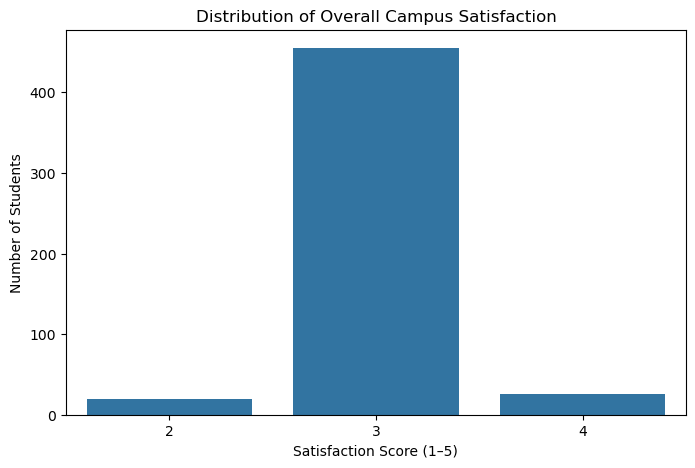

In [24]:
# 1. Distribution of Overall Campus Satisfaction
plt.figure(figsize=(8,5))
sns.countplot(x="overall_campus_satisfaction", data=df)
plt.title("Distribution of Overall Campus Satisfaction")
plt.xlabel("Satisfaction Score (1–5)")
plt.ylabel("Number of Students")
plt.show()

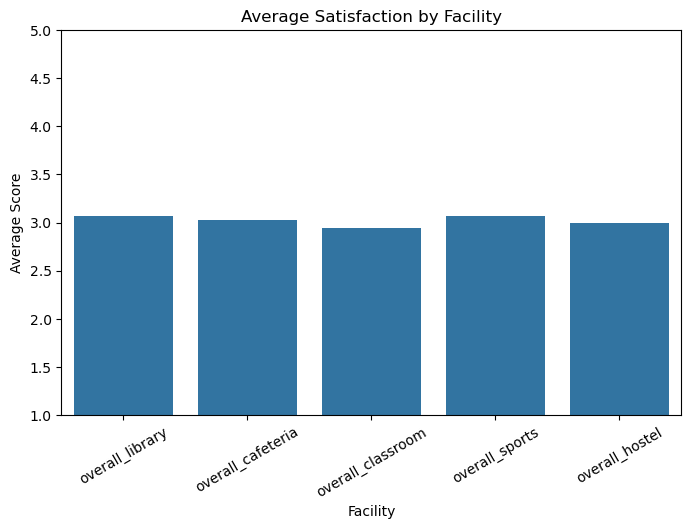

In [25]:
# 2. Facility-wise Average Satisfaction
facility_avg = df[[
    "overall_library",
    "overall_cafeteria",
    "overall_classroom",
    "overall_sports",
    "overall_hostel"
]].mean().reset_index()

facility_avg.columns = ["Facility", "Average Score"]

plt.figure(figsize=(8,5))
sns.barplot(x="Facility", y="Average Score", data=facility_avg)
plt.title("Average Satisfaction by Facility")
plt.xticks(rotation=30)
plt.ylim(1,5)
plt.show()

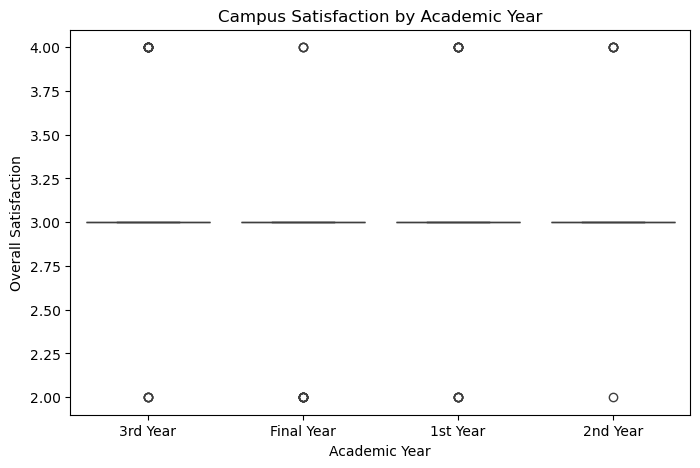

In [26]:
# 3. Satisfaction by Academic Year
plt.figure(figsize=(8,5))
sns.boxplot(
    x="academic_year",
    y="overall_campus_satisfaction",
    data=df
)
plt.title("Campus Satisfaction by Academic Year")
plt.xlabel("Academic Year")
plt.ylabel("Overall Satisfaction")
plt.show()

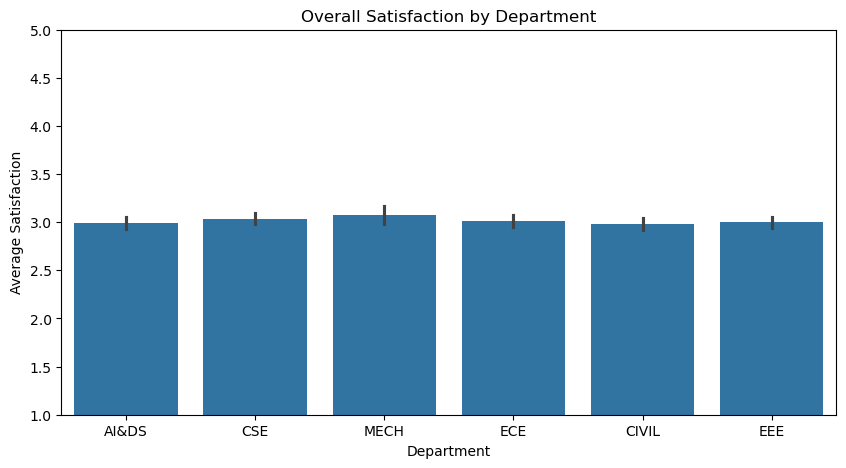

In [27]:
# 4. Department-wise Satisfaction Comparison
plt.figure(figsize=(10,5))
sns.barplot(
    x="major",
    y="overall_campus_satisfaction",
    data=df
)
plt.title("Overall Satisfaction by Department")
plt.xlabel("Department")
plt.ylabel("Average Satisfaction")
plt.ylim(1,5)
plt.show()

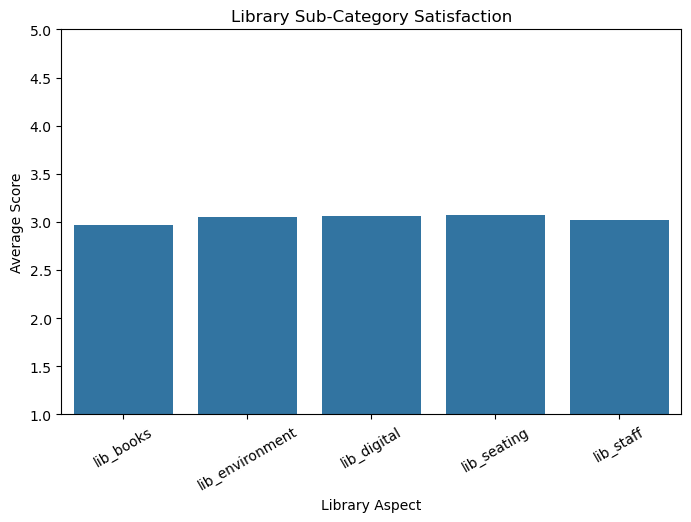

In [28]:
# 5. Library Sub-Category Analysis
library_cols = [
    "lib_books","lib_environment",
    "lib_digital","lib_seating","lib_staff"
]

library_avg = df[library_cols].mean().reset_index()
library_avg.columns = ["Library Aspect", "Average Score"]

plt.figure(figsize=(8,5))
sns.barplot(
    x="Library Aspect",
    y="Average Score",
    data=library_avg
)
plt.title("Library Sub-Category Satisfaction")
plt.xticks(rotation=30)
plt.ylim(1,5)
plt.show()

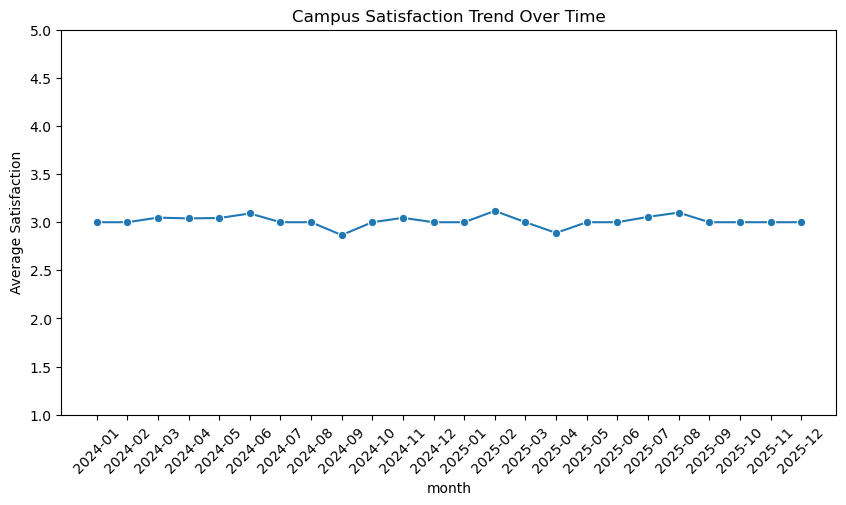

In [30]:
# 6. Satisfaction Trend Over Time
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["month"] = df["timestamp"].dt.to_period("M")

trend = df.groupby("month")["overall_campus_satisfaction"].mean().reset_index()
trend["month"] = trend["month"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(
    x="month",
    y="overall_campus_satisfaction",
    data=trend,
    marker="o"
)
plt.title("Campus Satisfaction Trend Over Time")
plt.xticks(rotation=45)
plt.ylabel("Average Satisfaction")
plt.ylim(1,5)
plt.show()

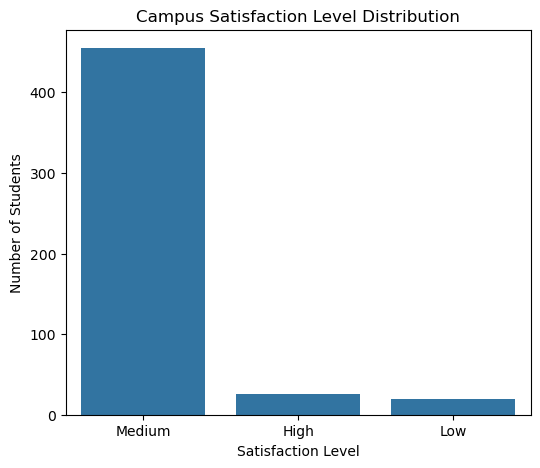

In [31]:
# 7. Satisfaction Level Distribution (Low/Medium/High)
plt.figure(figsize=(6,5))
sns.countplot(x="campus_satisfaction_level", data=df)
plt.title("Campus Satisfaction Level Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Students")
plt.show()

In [34]:
import pandas as pd

# Load feature engineered dataset
df = pd.read_csv("campus_pulse_feature_engineered_final.csv")
#Overall Average Campus Score
overall_avg_score = df["overall_campus_satisfaction"].mean().round(2)
#Average Score per Facility
facility_avg_scores = {
    "Library": df["overall_library"].mean().round(2),
    "Cafeteria": df["overall_cafeteria"].mean().round(2),
    "Classroom": df["overall_classroom"].mean().round(2),
    "Sports": df["overall_sports"].mean().round(2),
    "Hostel": df["overall_hostel"].mean().round(2)
}

facility_avg_df = pd.DataFrame(
    list(facility_avg_scores.items()),
    columns=["Facility", "Average Score"]
)
#Highest & Lowest Rated Facility
highest_rated_facility = facility_avg_df.loc[
    facility_avg_df["Average Score"].idxmax()
]

lowest_rated_facility = facility_avg_df.loc[
    facility_avg_df["Average Score"].idxmin()
]
#Satisfaction Level Percentage
satisfaction_distribution = (
    df["campus_satisfaction_level"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)
#Display Metrics
print("Overall Average Campus Score:", overall_avg_score)
print("\nAverage Score per Facility:\n", facility_avg_df)

print("\nHighest Rated Facility:")
print(highest_rated_facility)

print("\nLowest Rated Facility:")
print(lowest_rated_facility)

print("\nCampus Satisfaction Distribution (%):")
print(satisfaction_distribution)


Overall Average Campus Score: 3.01

Average Score per Facility:
     Facility  Average Score
0    Library           3.06
1  Cafeteria           3.03
2  Classroom           2.94
3     Sports           3.07
4     Hostel           2.99

Highest Rated Facility:
Facility         Sports
Average Score      3.07
Name: 3, dtype: object

Lowest Rated Facility:
Facility         Classroom
Average Score         2.94
Name: 2, dtype: object

Campus Satisfaction Distribution (%):
campus_satisfaction_level
Medium    91.0
High       5.2
Low        3.8
Name: proportion, dtype: float64
